# Boston House Pricing - Regressão com Redes Neurais
Esse notebook explora um dos datasets mais conhecidos de Machine Learning: Boston House Pricing. O objetivo é treinar uma Rede Neural para realizar regressões, a fim de realizar predições dos preços dos imóveis. Aqui é realizada uma breve análise exploratória de dados, considerações éticas do conjunto de dados, construção e treinamento da rede neural, verificação dos resultados. É também abordado a busca de hyperparâmetros com o auxílio de um tuner.  

## Importar Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load e descrição do Dataset
[The Boston house-price data](http://lib.stat.cmu.edu/datasets/boston)
Esse dataset, mantido pela Carnegie Mellon University, é um conjunto de dados clássico e frequentemente usado em aprendizado de máquina e regressão. Ele contém informações sobre 506 casas vendidas em subúrbios de Boston entre 1970 e 1978. O objetivo do conjunto de dados é prever o preço de uma casa com base em 13 variáveis (*features*), como:

- CRIM: taxa de criminalidade per capita (por town).
- ZN: proporção de área residencial zoneada para grandes lotes
- INDUS: proporção de área zoneada para uso industrial (por town)
- CHAS: Charles River (binário: 1 se beira o rio, 0 se não)
- NOX: concentração de óxidos de nitrogênio (partes por milhão)
- RM: número médio de quartos por moradia
- AGE: proporção de unidades ocupadas pelos proprietários construídas antes de 1940
- DIS: distância ponderada para cinco centros de emprego de Boston (milhas)
- RAD: índice de acessibilidade de radial highways
- TAX: taxa de imposto de propriedade por $10.000
- PTRATIO: razão aluno-professor nas escolas (por town).
- B: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros (por town).
- LSTAT: porcentagem da população que não concluiu o ensino médio


<br>
O target, ou valor a ser previsto, é dado pela coluna MEDV:

- MEDV (TARGET): Valor mediano das casas ocupadas pelos proprietários em US$ 1.000s

<br>

**Objetivo**
Construir um **modelo de regressão** que usa as informações disponíveis (*features*) dessa base de dados como input e retorna um único valor de predição do valor da casa (em US$ 1000) como output.

O dataset pode ser obtido diretamente de: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)


In [2]:
# O keras possui alguns datasets prontos para serem usados
# Entre eles, o boston_housing (descrito acima)
data = tf.keras.datasets.boston_housing

# dividindo o conjunto de dados entre os dados de treinamento e teste
(x_treino, y_treino), (x_teste, y_teste) = data.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
# 404 samples, com 13 colunas (features)
print(y_treino.shape)
# 404 saidas (labels)
print(y_treino.shape)

(404,)
(404,)


In [4]:
# verificando dados separados para teste
print(x_teste.shape)
print(y_teste.shape)

(102, 13)
(102,)


In [5]:
# verificando features da linha 0
y_treino[0]

15.2

In [6]:
# label da linha 0
y_treino[0]

15.2

### Explorando o Target (Y)

In [7]:
# 5 primeiros itens do target
y_treino[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

In [8]:
# Obtendo algumas métricas das labels de treino
print('Preço mínimo em $K:', y_treino.min())
print('Preço médio $K:', round(y_treino.mean(), 2))
print('Preço máximo em $K:', y_treino.max())

Preço mínimo em $K: 5.0
Preço médio $K: 22.4
Preço máximo em $K: 50.0


In [9]:
# Obtendo algumas métricas das labels de teste
print('Preço mínimo em $K:', y_teste.min())
print('Preço médio $K:', round(y_teste.mean(), 2))
print('Preço máximo em $K:', y_teste.max())

Preço mínimo em $K: 5.6
Preço médio $K: 23.08
Preço máximo em $K: 50.0


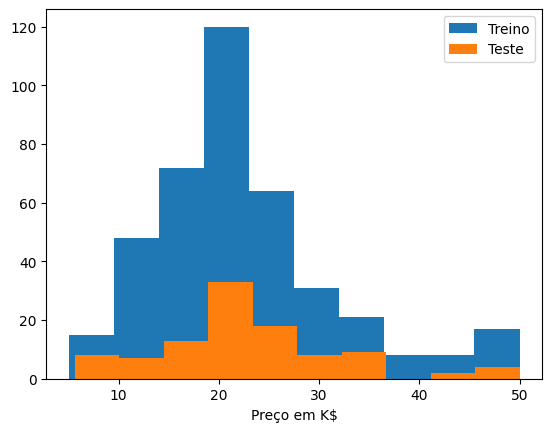

In [10]:
# Gerando histogramas com essas métricas
plt.hist(y_treino, label='Treino')
plt.hist(y_teste, label = 'Teste')
plt.xlabel('Preço em K$')
plt.legend();
# Notar que os dados de treinamento tem mais ou menos a mesma distribuição
# Isso é algo bom e necessário para um bom treinamento do algoritmo

### Explorando os Atributos de Entrada (X)

In [11]:
# Quantas features existem no dataset
len(x_treino[1])

13

In [12]:
# Verificar o min e o max de cada feature (atributos)
for i in range(len(x_treino[0])):
  print(f"Atributo {i}: varia de {x_treino[:,i].min()} a {x_treino[:,i].max()}")


Atributo 0: varia de 0.00632 a 88.9762
Atributo 1: varia de 0.0 a 100.0
Atributo 2: varia de 0.46 a 27.74
Atributo 3: varia de 0.0 a 1.0
Atributo 4: varia de 0.385 a 0.871
Atributo 5: varia de 3.561 a 8.725
Atributo 6: varia de 2.9 a 100.0
Atributo 7: varia de 1.1296 a 10.7103
Atributo 8: varia de 1.0 a 24.0
Atributo 9: varia de 188.0 a 711.0
Atributo 10: varia de 12.6 a 22.0
Atributo 11: varia de 0.32 a 396.9
Atributo 12: varia de 1.73 a 37.97


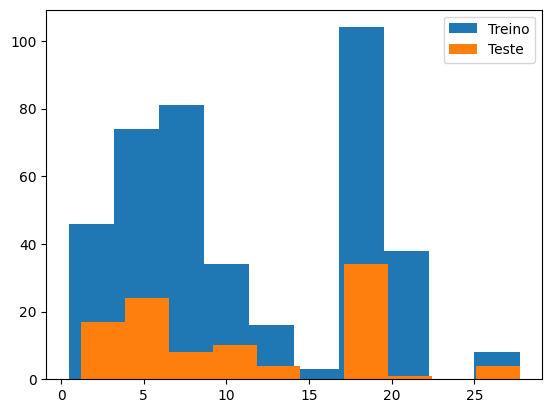

In [13]:
# mudar o numero da feature na linha abaixo plota um gráfico diferente
feature = 2
plt.hist(x_treino[:,feature], label='Treino')
plt.hist(x_teste[:,feature], label='Teste')
plt.legend();

## Dilema Ético

O conjunto de dados original apresenta um atributo `B` que é calculado com base na proporção de negros por town. Apesar de ser um dado estatístico que tenha alguma correlação com o preço atual das residências, não é um atributo que deve ser usado como base para definir o preço futuro de um imóvel. Em outras palavras, é possível que uma town com proporção diferente de negros apresente variações de preços inferidos por causa desse atributo. O preço de uma casa não deveria ser mais caro ou mais barato com base na cor da pele de quem mora na vizinhança. Portanto, optou-se por remover esse atributo e não utilizá-lo no treinamento do modelo.

In [14]:
x_treino[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [15]:
import pandas as pd

In [16]:
# Convertendo conjunto de treino em um dataframe pandas para facilitar a remoção
df_x_treino = pd.DataFrame(x_treino)
df_x_teste = pd.DataFrame(x_teste)
df_x_treino.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [17]:
# As colunas do conjunto de dados estão em ordem com os nomes dos atributos passados anteriormente
# Portanto, a coluna referente ao atributo D é a de número 11.
df_x_treino = df_x_treino.drop(11, axis=1).copy()
df_x_teste = df_x_teste.drop(11, axis=1).copy()

In [18]:
df_x_treino.head()

,0,1,2,3,4,5,6,7,8,9,10,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65


In [19]:
# Retornando conjunto de treino e teste para formato de array
x_treino = df_x_treino.to_numpy()
x_teste = df_x_teste.to_numpy()

## Construindo Modelo (Rede Neural)

### Pré-processamento dos dados

**Normalizando os dados**:


In [20]:
# StandardScaler aplica uma escala a um conjunto de dados (normaliza)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit do scaler no conjunto de treinamento (somente)
scaler.fit(x_treino)

# then we call the transform method to scale both the training and testing data
x_treino_normalizado = scaler.transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

>Another way do normalize data directly with numpy is:
- Get per-feature statistics (mean, standard deviation) from the training set to normalize by:
  - x_train_mean = np.mean(x_train, axis=0)
  - x_train_std = np.std(x_train, axis=0)
  - x_train_norm = (x_train - x_train_mean) / x_train_std
  - x_test_norm = (x_test - x_train_mean) / x_train_std

**Nota:** os valores usados para normalizar os dados de teste devem ser calculados usando os dados de treinamento. Nunca deve-se usar em seu fluxo de trabalho qualquer quantidade computada nos dados de teste, mesmo para algo tão simples como a normalização de dados.

In [21]:
# Verificando máximnos e mínimos dos dados normalizados
print (x_treino_normalizado.max())
print (x_treino_normalizado.min())

9.234847178400434
-3.8172503201932804


In [22]:
x_treino.shape

(404, 12)

In [23]:
input_shape = x_treino.shape[1]
input_shape # 12 features de entrada (características das casas/vizinhança)

12

As **Input Layer** devem ser 12 (número de features/atributos) e a **Output Layer** deve ser apenas 1 para corresponder ao target (y). O número de neurônios nas **Hidden layers** é arbitrário.

In [24]:
# Quanto mais simples melhor. Muitos neurônios podem fazer o modelo muito bom para
# o treino, mas não ser capaz de realizar inferências de forma satisfatória (overfit)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(20, activation='relu'), # começando com 20
    tf.keras.layers.Dense(1)
    ])

# activation='relu' : cria a não linearidade (simula o comportamento do diodo)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A camada de entrada possui 12 conexões, uma para cada feature/atributo [X]. Cada atributo vai para cada um dos neurônios da 1ª camada, que possui 20 Neurônios. Portanto, os parâmetros totais da 1ª camada serão ws=(12 x 20) + (bs=20) = 260. A camada de saída será apenas um neurônio que possui uma entrada da saída da camada anterior (20) + 1 b = => 21.

Para simplificar, a camada de entrada pode ser "mesclada com a 1ª camada"

In [25]:
# Esse código abaixo é só uma outra forma de gerar o mesmo modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20,
                          activation='relu',
                          input_shape = [12]),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilando Modelo

### Parâmetros
**Loss function:** MSE (Mean Squared Error). Mede a média dos quadrados dos erros - ou seja, a diferença quadrática média entre os valores estimados e o que é observado.

**Optimizer:** O otimizador usado é o [ADAM](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), um método estocástico de gradiente descendente baseado na estimativa adaptativa de momentos de primeira e segunda ordem. O hiperparâmetro "Taxa de aprendizagem" usado é o padrão (0,001).

**Metrics** - [Keras Metrics](https://keras.io/api/metrics/)

>"A metric is a function that is used to judge the performance of your model.
Metric functions are similar to loss functions, except that the results from evaluating a metric **are not used when training the model**. Note that you may use any loss function as a metric."



In [26]:
# Escolher o erro do modelo
# É interessante que o erro seja apresentado na mesma unidade da métrica,
# como o RSME faz.
model.compile(
    optimizer='adam', # deixa um pouco mais pesado, mas é o mais utilizado
    loss='mse',
    metrics=['mae'] # usado para monitorar os estágio de treino e teste (por manter magnitude)
    )

## Treinamento do modelo

In [27]:
history = model.fit(
    x_treino_normalizado,
    y_treino,
    epochs=1000, # 1000 épocas
    verbose=0 # evitar comentários do treinamento
    )

**Verificando o modelo**

In [28]:
train_eval = model.evaluate(x_treino_normalizado, y_treino)
print ("MAE dos dados de treinamento: {:.2}".format(train_eval[1]))
# MAE: 1.7 = $ 1.700,00

13/13 [==============================] - 0s 2ms/step - loss: 6.0030 - mae: 1.7128
MAE dos dados de treinamento: 1.7


In [29]:
history.history.keys()

dict_keys(['loss', 'mae'])

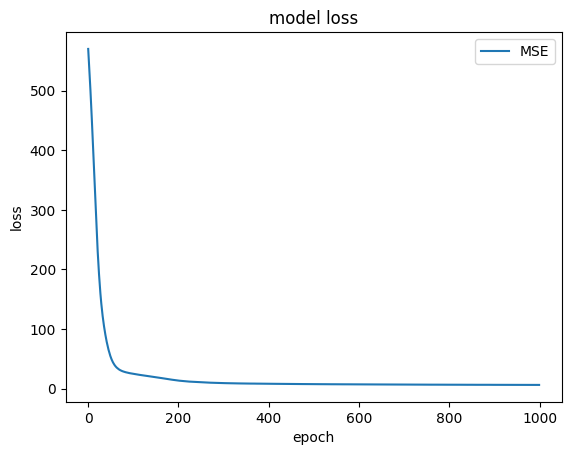

In [30]:
# MSE = $^2 (unidade)
plt.plot(history.history['loss'], label='MSE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

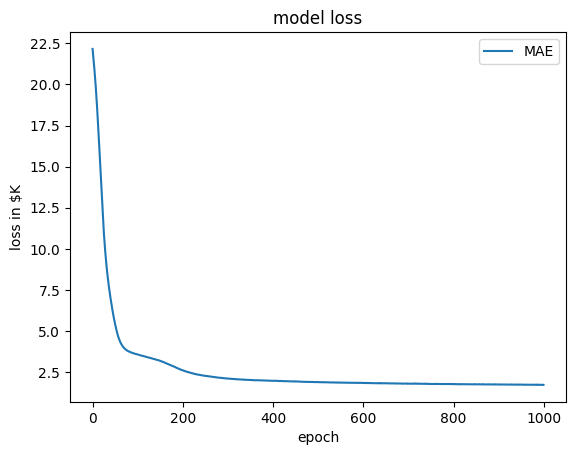

In [31]:
# MAE = $ (unidade)
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss in $K')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testando o modelo treinado



In [32]:
# Testando com dados novos (conjunto de teste)
test_eval = model.evaluate(x_teste_normalizado, y_teste)
print ("MAE dos dados de teste: {:.2}".format(test_eval[1]))

4/4 [==============================] - 0s 4ms/step - loss: 17.0506 - mae: 2.6874
MAE dos dados de teste: 2.7


In [33]:
# Calculando o valor do Root Mean Square Error (RMSE)
rmse = round(np.sqrt(test_eval[0]), 3)
rmse

4.129

O modelo obteve erro RSME de aproximadamente USD 4,000 e MAE de aproximadamente USD 2,700. Isso é muito bom para uma estimativa de preço de imóveis.  

> Nota: Com features **sem normalização**, obtemos loss (MSE): 22.0815; RSME: USD 4,700 e  MAE: USD 3,500

**Comparando valores previstos e reais:**

In [35]:
y_hat = model.predict(x_teste_normalizado) # y_hat é o nome dado para o valor previsto
print(y_hat[:5]) # obtem os valores previstos para as 5 primeiras amostras

4/4 [==============================] - 0s 3ms/step
[[ 7.462253]
 [18.642235]
 [22.04129 ]
 [37.031467]
 [24.996452]]


In [36]:
y_teste[:5] # valores reais conhecidos das primeiras 5 amostras

array([ 7.2, 18.8, 19. , 27. , 22.2])

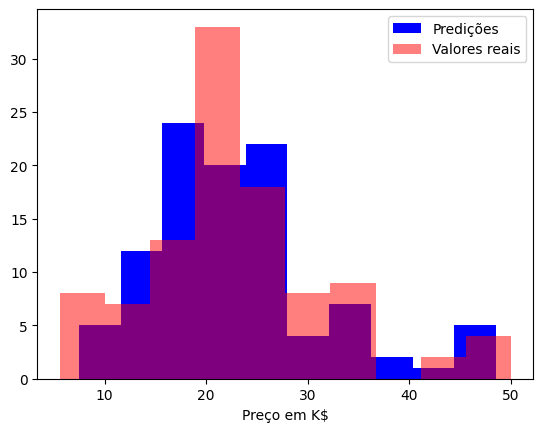

In [37]:
plt.hist(y_hat, label='Predições', color = 'b')
plt.hist(y_teste, label = 'Valores reais', color = 'r', alpha=0.5) # alpha é a transparência das colunas
plt.xlabel('Preço em K$')
plt.legend();

## Inferindo

In [38]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 19.5]) # valores "aleatórios"
xt.shape

(12,)

In [39]:
x_treino.shape

(404, 12)

In [40]:
xt = np.reshape(xt, (1, 12)) # reshape porque input deve ser uma matriz 1x12
xt.shape

(1, 12)

In [41]:
xt

array([[  1.1,   0. ,   9. ,   0. ,   0.6,   7. ,  92. ,   3.8,   4. ,
        300. ,  21. ,  19.5]])

In [42]:
# Normalizando os dados
xt_norm = scaler.transform(xt) # mesmo scaler feito com os dados de treinamento
xt_norm

array([[-0.28659955, -0.48361547, -0.30934443, -0.25683275,  0.36401915,
         1.03386853,  0.82381223,  0.02945662, -0.62624905, -0.63729594,
         1.14850044,  0.93287232]])

In [43]:
yt = model.predict(xt_norm)
yt

1/1 [==============================] - 0s 21ms/step


array([[17.552336]], dtype=float32)

In [45]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 19.5])
xt = np.reshape(xt, (1, 12))
xt_norm = scaler.transform(xt)
yt = model.predict(xt_norm)
print("O valor predito para essa casa é de US${:.2f} mil".format(yt[0][0]))

1/1 [==============================] - 0s 36ms/step
O valor predito para essa casa é de US$17.55 mil


# Extra
## Encontrando os Hyperparameters corretos
- [KerasTuner](https://keras.io/keras_tuner/)

>KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search.


In [46]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [47]:
import tensorflow as tf
import keras_tuner as kt

In [48]:
data = tf.keras.datasets.boston_housing
(x_treino, y_treino), (x_teste, y_teste) = data.load_data()

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_treino)

# then we call the transform method to scale both the training and testing data
x_treino_normalizado = scaler.transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

Função que cria e retorna um modelo Keras. Argumento `hp` define hyperparâmetros para criação do modelo.

In [50]:
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      hp.Choice('units', [10, 20, 30]), # testa com 10, 20 e 30 neurônios (searchGrid)
      activation='relu'))

  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

Inicializa o tuner (RandomSearch).
- objective: especifica o objetivo para selecionar o melhor modelo
- max_trials: especifica o número de modelos diferentes que irá testar

In [51]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Inicia busca e obtém melhor modelo:

In [52]:
tuner.search(
    x_treino_normalizado, y_treino,
    epochs=500,
    validation_data=(x_teste_normalizado, y_teste))

best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 46s]
val_loss: 18.228408813476562

Best val_loss So Far: 18.228408813476562
Total elapsed time: 00h 03m 02s


### Resultados

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30], 'ordered': True}


In [54]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 30
Score: 18.228408813476562

Trial 1 summary
Hyperparameters:
units: 20
Score: 18.32400131225586

Trial 0 summary
Hyperparameters:
units: 10
Score: 21.953813552856445
